<a href="https://colab.research.google.com/github/zecojls/SoilSpec4GG_GoogleColab/blob/main/SoilSpec4GG_001_first_contact_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Initial setup and packages

1. Checking the packages-installation folder


In [ ]:
#.libPaths()

2. Checking working directory

In [ ]:
#getwd()

3. Listing working directory. *sample_data* comes from default Google Colab notebook

In [ ]:
#list.files()

4. Checking available (native) packages that are already loaded



In [ ]:
#search()

5. Checking available (native) packages that are already installed, but not loaded

In [ ]:
#with(data.frame(installed.packages()), Package)

5. Installing required packages. NOTE: the packages must be reinstalled every session

In [ ]:
install.packages("prospectr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘foreach’, ‘iterators’, ‘mathjaxr’, ‘RcppArmadillo’




6. Loading the required packages.

In [ ]:
library(tidyverse)
library(prospectr)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

prospectr version 0.2.2 -- 'flawil'

check the github repository at: http://github.com/l-ramirez-lopez/prospectr



# Loading KSSL dataset from OSSL

Loading the KSSL MIR data from OSSL S3 bucket.

In [ ]:
ossl_mir = readRDS(url('http://s3.eu-central-1.wasabisys.com/soilspectroscopy/ossl_data/kssl.ssl/ossl_mir_v1.rds'))
class(ossl_mir)
dim(ossl_mir)

[1] "data.frame"

[1] 69914  1717

Loading the KSSL labinfo data from OSSL S3 bucket.

In [ ]:
ossl_soillab = readRDS(url('http://s3.eu-central-1.wasabisys.com/soilspectroscopy/ossl_data/kssl.ssl/ossl_soillab_v1.rds'))
class(ossl_soillab)
dim(ossl_soillab)

[1] "data.frame"

[1] 64872    60

# Exploring the soil laboratory information

Column names

In [ ]:
names(ossl_soillab)

[1] "id.layer_uuid_c"                 "id.layer_local_c"               
 [3] "sample.doi_idf_c"                "sample.contact.name_utf8_txt"   
 [5] "sample.contact.email_ietf_email" "acid.tea_usda4b2_cmolkg"        
 [7] "al.dith_usda.4g1_wpct"           "al.kcl_usda.4b3_cmolkg"         
 [9] "al.ox_usda.4g2_wpct"             "bsat_usda.4b4_wpct"             
[11] "bd.clod_usda.3b1_gcm3"           "bd.od_usda.3b2_gcm3"            
[13] "ca.ext_usda.4b1_cmolkg"          "c.tot_usda.4h2_wpct"            
[15] "caco3_usda.4e1_wpct"             "cec.ext_usda.4b1_cmolkg"        
[17] "clay.tot_usda.3a1_wpct"          "gyp_usda.4e2_wpct"              
[19] "ecec_usda.4b4_cmolkg"            "ec.w_usda.4f1_dsm"              
[21] "oc_usda.calc_wpct"               "fe.dith_usda.4g1_wpct"          
[23] "fe.kcl_usda.4b3_mgkg"            "fe.ox_usda.4g2_wpct"            
[25] "mg.ext_usda.4b1_cmolkg"          "n.tot_usda.4h2_wpct"            
[27] "ph.kcl_usda.4c1_index"           "ph.h2o_usda.4c1_index"          
[29] "ph.cacl2_usda.4c1_index"         "ph.naf_usda.4c1_index"          
[31] "p.ext_usda.4d6_mgkg"             "p.olsn_usda.4d5_mgkg"           
[33] "k.ext_usda.4b1_cmolkg"           "sand.tot_usda.3a1_wpct"         
[35] "wpg2_usda.3a2_wpct"              "silt.tot_usda.3a1_wpct"         
[37] "clay.tot_usda.3a1_wpct.1"        "na.ext_usda.4b1_cmolkg"         
[39] "s.tot_usda.4h2_wpct"             "sum.bases_4b4b2a_cmolkg"        
[41] "wr.33kbar_usda.3c1_wpct"         "wr.1500kbar_usda.3c2_wpct"      
[43] "al.meh3_usda.4d6_wpct"           "as.meh3_usda.4d6_mgkg"          
[45] "ba.meh3_usda.4d6_mgkg"           "ca.meh3_usda.4d6_mgkg"          
[47] "cd.meh3_usda.4d6_wpct"           "co.meh3_usda.4d6_mgkg"          
[49] "cr.meh3_usda.4d6_mgkg"           "cu.meh3_usda.4d6_mgkg"          
[51] "p.meh3_usda.4d6_mgkg"            "k.meh3_usda.4d6_mgkg"           
[53] "na.meh3_usda.4d6_mgkg"           "mg.meh3_usda.4d6_mgkg"          
[55] "fe.meh3_usda.4d6_mgkg"           "pb.meh3_usda.4d6_mgkg"          
[57] "zn.meh3_usda.4d6_mgkg"           "mo.meh3_usda.4d6_mgkg"          
[59] "si.meh3_usda.4d6_mgkg"           "sr.meh3_usda.4d6_mgkg"

In [ ]:
ossl_soillab %>% select('oc_usda.calc_wpct') %>% summary()

 oc_usda.calc_wpct
 Min.   :-0.9364  
 1st Qu.: 0.3400  
 Median : 1.0100  
 Mean   : 4.7313  
 3rd Qu.: 2.7146  
 Max.   :78.4500  
 NA's   :326      

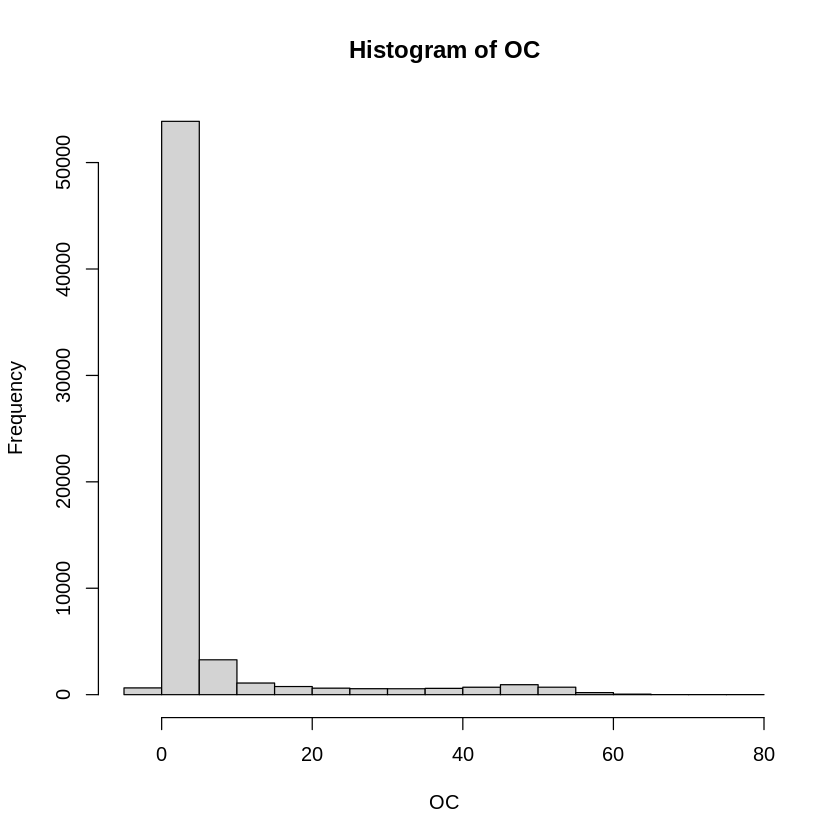

In [ ]:
ossl_soillab %>% pull('oc_usda.calc_wpct') %>% hist(xlab = "OC", main = "Histogram of OC")

# Exploring the MIR dataset

The first 16 colums are metadata

In [ ]:
names(ossl_mir[1:16])


[1] "id.scan_uuid_c"                      "id.scan_local_c"                    
 [3] "id.layer_uuid_c"                     "id.layer_local_c"                   
 [5] "model.name_utf8_txt"                 "model.code_any_c"                   
 [7] "method.light.source_any_c"           "method.preparation_any_c"           
 [9] "scan.file_any_c"                     "scan.date.begin_iso.8601_yyyy.mm.dd"
[11] "scan.date.end_iso.8601_yyyy.mm.dd"   "scan.license.title_ascii_txt"       
[13] "scan.license.address_idn_url"        "scan.doi_idf_c"                     
[15] "scan.contact.name_utf8_txt"          "scan.contact.email_ietf_email"

The remaining is absorbance data

In [ ]:
names(ossl_mir[17:26])

[1] "scan_mir.600_abs" "scan_mir.602_abs" "scan_mir.604_abs" "scan_mir.606_abs"
 [5] "scan_mir.608_abs" "scan_mir.610_abs" "scan_mir.612_abs" "scan_mir.614_abs"
 [9] "scan_mir.616_abs" "scan_mir.618_abs"

Cheking available metadata

In [ ]:
mir_info <- ossl_mir[1:16]

mir_info %>%
  sample_n(2) %>%
  t()

id.scan_uuid_c,4e80cb728aee807c66bb8157dcaa1159,45a0c08d03bd27b37ab4b7d7fde06282
id.scan_local_c,174806,98927
id.layer_uuid_c,4d2762efe2d3bdcc0316b8f4db483ee1,6287b0e20111819a31f6d7eb493a501f
id.layer_local_c,78140,36861
model.name_utf8_txt,Bruker Vertex 70 with HTS-XT accessory,Bruker Vertex 70 with HTS-XT accessory
model.code_any_c,Bruker_Vertex_70.HTS.XT,Bruker_Vertex_70.HTS.XT
method.light.source_any_c,,
method.preparation_any_c,,
scan.file_any_c,,
scan.date.begin_iso.8601_yyyy.mm.dd,2020-11-20,2020-11-20
scan.date.end_iso.8601_yyyy.mm.dd,2020-11-20,2020-11-20


Selecting only ID and spectra columns

In [ ]:
mir_spectra <- ossl_mir[c(2, 17:ncol(ossl_mir))]
wavenumbers <- seq(600, 4000, by = 2)
names(mir_spectra) <- c("ID", wavenumbers)
head(mir_spectra)

,ID,600,602,604,606,608,610,612,614,616,⋯,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,32987,1613,1615,1617,1620,1624,1627,1630,1633,1635,⋯,347,346,346,346,346,346,345,345,345,344
2,32988,1561,1567,1576,1584,1592,1600,1607,1612,1617,⋯,276,276,276,276,276,275,275,275,275,274
3,32989,1710,1720,1729,1737,1746,1755,1763,1768,1773,⋯,369,369,369,369,369,368,368,367,367,366
4,32990,1653,1659,1668,1679,1689,1697,1702,1707,1712,⋯,359,359,359,359,358,358,358,357,357,357
5,32991,1517,1525,1537,1550,1561,1571,1577,1582,1587,⋯,341,341,341,341,341,341,340,340,340,340
6,32992,1491,1499,1509,1520,1532,1541,1546,1547,1547,⋯,309,309,309,309,309,308,308,308,308,307


Subsetting the data

In [ ]:
set.seed(1993)
mir_spectra %>%
  sample_n(10)

ID,600,602,604,606,608,610,612,614,616,⋯,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
38943,1490,1496,1504,1513,1525,1535,1544,1550,1557,⋯,178,177,177,177,177,176,176,176,176,175
244684,1804,1813,1828,1847,1869,1893,1916,1935,1952,⋯,399,398,398,398,397,397,396,396,395,394
270409,1745,1745,1745,1747,1749,1751,1750,1748,1746,⋯,321,320,320,320,319,318,318,317,317,316
153464,1495,1494,1494,1493,1491,1490,1488,1485,1480,⋯,196,196,196,195,195,195,194,194,194,194
208228,1691,1708,1725,1742,1758,1774,1789,1804,1816,⋯,371,371,370,370,370,369,369,369,368,368
179123,1657,1661,1667,1674,1681,1687,1692,1696,1699,⋯,163,163,163,162,162,161,160,160,159,159
209484,1462,1464,1469,1477,1486,1493,1497,1498,1498,⋯,138,138,138,138,138,137,137,137,136,136
222591,1404,1392,1381,1370,1359,1349,1338,1328,1319,⋯,162,162,162,162,162,162,162,162,162,162
182064,1618,1618,1619,1621,1623,1624,1621,1616,1611,⋯,128,128,127,127,126,126,125,124,124,123


# Simple preprocessing and graphical visualization

Raw absorbance spectra from a sample. A png file is exported to the working directory.

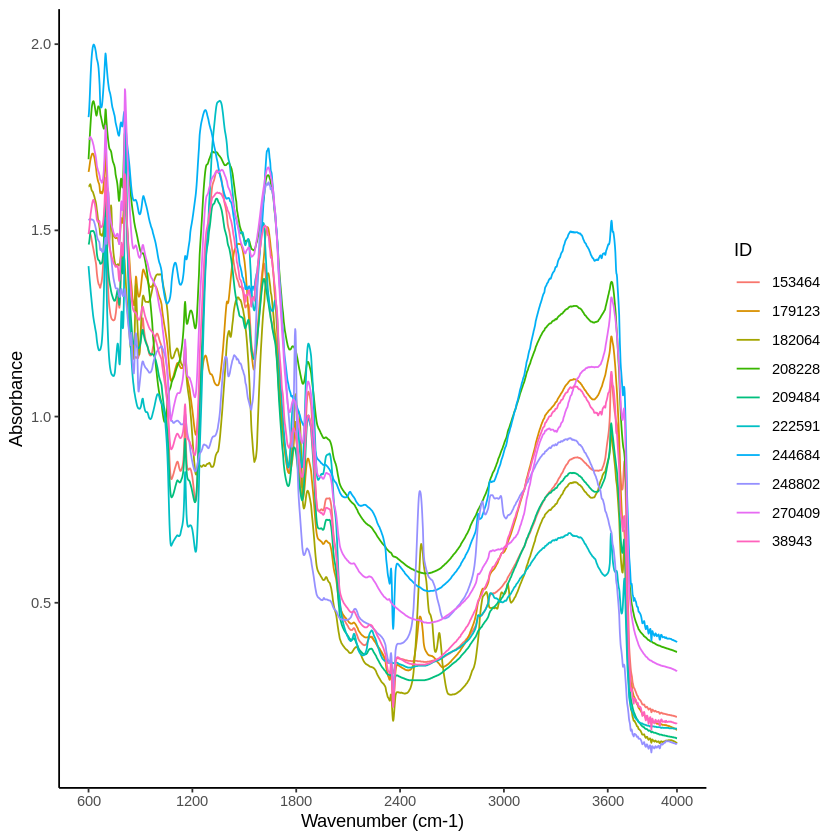

In [ ]:
set.seed(1993)

plot_spectra <- mir_spectra %>%
  sample_n(10) %>%
  pivot_longer(-ID, names_to = "wavenumbers", values_to = "absorbance") %>%
  mutate(ID = as.factor(ID), wavenumbers = as.numeric(wavenumbers)) %>%
  ggplot(aes(x = wavenumbers, y = absorbance/1000, group = ID, color = ID)) +
  geom_line() + labs(x = "Wavenumber (cm-1)", y = "Absorbance") +
  scale_x_continuous(breaks = c(600, 1200, 1800, 2400, 3000, 3600, 4000)) +
  theme_classic()

ggsave("sample_spectra_raw.png", plot_spectra, dpi = 200, width = 8, height = 6,
        units = "in", scale = 1)

plot_spectra

First derivative of raw absorbance sample spectra. A png file is exported to the working directory.

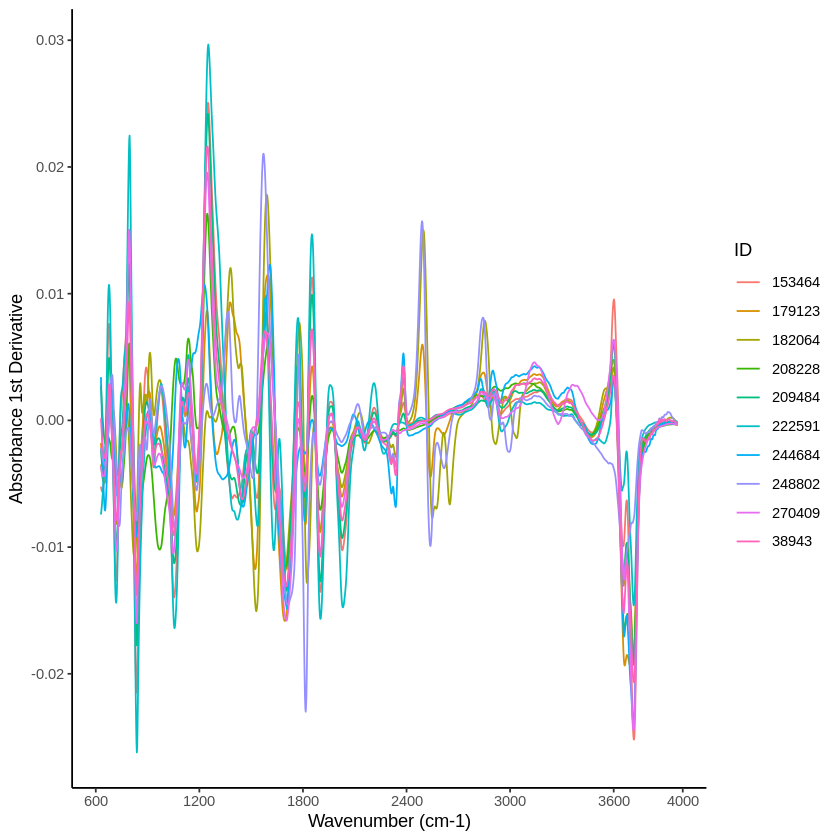

In [ ]:
set.seed(1993)

plot_1stDer <- mir_spectra %>%
  select(-ID) %>%
  as.matrix() %>%
  gapDer(X = ., m = 1, w = 11, s = 10) %>%
  as_tibble() %>%
  bind_cols(tibble("ID" = mir_spectra[,1])) %>%
  select("ID", everything()) %>%
  sample_n(10) %>%
  pivot_longer(-ID, names_to = "wavenumbers", values_to = "absorbance_1stDer") %>%
  mutate(ID = as.factor(ID), wavenumbers = as.numeric(wavenumbers)) %>%
  ggplot(aes(x = wavenumbers, y = absorbance_1stDer/1000, group = ID, color = ID)) +
  geom_line() + labs(x = "Wavenumber (cm-1)", y = "Absorbance 1st Derivative") +
  scale_x_continuous(breaks = c(600, 1200, 1800, 2400, 3000, 3600, 4000)) +
  theme_classic()

ggsave("sample_spectra_1stDer.png", plot_1stDer, dpi = 200, width = 8, height = 6,
        units = "in", scale = 1)

plot_1stDer